In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'



Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


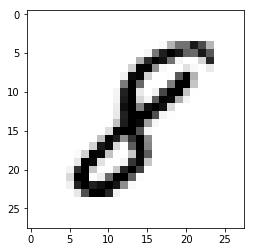

In [3]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
# Importing the required Keras modules containing model and layers
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.2136 - acc: 0.9351
Epoch 2/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0845 - acc: 0.9743
Epoch 3/10
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0614 - acc: 0.9806
Epoch 4/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0454 - acc: 0.9856
Epoch 5/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0363 - acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0297 - acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0259 - acc: 0.9917
Epoch 8/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0249 - acc: 0.9919
Epoch 9/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0216 - acc: 0.9926
Epoch 10/10
60000/60000 [==================

In [8]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 9s 872us/step


[0.06801641180484148, 0.9846]

9


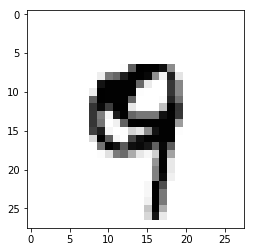

In [9]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [21]:
import sklearn.metrics as skm
import numpy as np

In [11]:
pr = model.predict(x_test)

In [17]:
pr.shape

(10000, 10)

In [24]:
skm.confusion_matrix(y_test, np.argmax(pr,axis=1))

array([[ 974,    0,    1,    0,    0,    0,    1,    1,    2,    1],
       [   0, 1127,    4,    0,    0,    1,    2,    1,    0,    0],
       [   1,    0, 1015,    1,    3,    0,    1,    9,    0,    2],
       [   0,    0,    1,  994,    0,    5,    0,    4,    1,    5],
       [   0,    0,    1,    0,  964,    0,    6,    0,    2,    9],
       [   2,    0,    1,    8,    0,  875,    5,    0,    1,    0],
       [   3,    2,    1,    1,    2,    2,  946,    0,    1,    0],
       [   0,    0,    6,    0,    0,    0,    0, 1019,    1,    2],
       [   4,    0,    2,    7,    2,    3,    2,    4,  945,    5],
       [   1,    3,    0,    3,    5,    4,    1,    4,    1,  987]])

In [25]:
print(skm.classification_report(y_test, np.argmax(pr,axis=1)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

